In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../input/water-quality/waterQuality1.csv')

data = data.drop('ammonia', axis = 1)
data = data.drop('flouride', axis = 1)
data = data.drop('selenium', axis = 1)
data = data.drop('uranium', axis = 1)

data = data[data['is_safe'] != '#NUM!']
data['is_safe'] = data['is_safe'].astype(int)

columns = dict(zip(list(range(data.shape[1])), data.columns.values.tolist()))
is_safe = data['is_safe']

data = pd.DataFrame(StandardScaler().fit_transform(data)).rename(columns = columns)
data['is_safe'] = is_safe
data = data.dropna()

data.head(6)

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,silver,is_safe
0,0.777403,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.338736,1.0
1,1.306945,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,0.851134,1.0
2,0.271572,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,2.035310,0.0
3,0.548198,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,2.104968,1.0
4,0.200439,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-0.611672,1.0
5,0.216246,-0.520460,1.078873,-1.104207,-0.536643,0.675051,0.878366,1.063162,0.902680,0.611523,-0.012496,0.977180,0.272132,0.605207,1.076306,0.293875,1.0


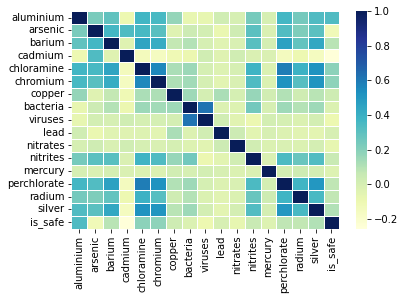

In [3]:
sns.heatmap(data = data.corr(), linewidths = .5, annot = False, cmap = "YlGnBu")
plt.show()

1. Понижение размерности и визуализация данных

Примените методы снижения размерности sklearn.decomposition.PCA и
sklearn.manifold.TSNE для визуализации данных с которым вы работали в лабораторной №2 (снижая размерность до двух).

In [4]:
X = data.drop('is_safe', axis = 1)
Y = data['is_safe']

In [5]:
X_PCA_pl = PCA(n_components = 2).fit_transform(X)
PCA_data_pl = pd.DataFrame(data = X_PCA_pl, columns = ['PC1', 'PC2'])
PCA_data_pl['is_safe'] = Y
PCA_data_pl.head(6)

,PC1,PC2,is_safe
0,2.197502,-1.134344,1.0
1,2.910882,1.230870,1.0
2,2.088900,-1.274858,0.0
3,1.738801,1.806707,1.0
4,-0.201248,-0.758984,1.0
5,1.510632,1.591487,1.0


In [6]:
X_TSNE_pl = TSNE(n_components = 2).fit_transform(X)
TSNE_data_pl = pd.DataFrame(data = X_TSNE_pl, columns = ['TSNE1', 'TSNE2'])
TSNE_data_pl['is_safe'] = Y
TSNE_data_pl.head(6)

,TSNE1,TSNE2,is_safe
0,-15.944971,-20.437408,1.0
1,23.259008,-29.028210,1.0
2,-15.441889,-23.362444,0.0
3,61.713291,-27.566795,1.0
4,-23.253855,-10.035088,1.0
5,38.572998,-14.887375,1.0


Отобразите полученные результаты

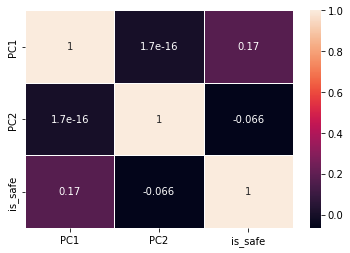

In [7]:
sns.heatmap(data = PCA_data_pl.corr(), linewidths = .5, annot = True)
plt.show()

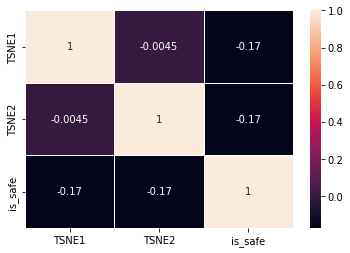

In [8]:
sns.heatmap(data = TSNE_data_pl.corr(), linewidths = .5, annot = True)
plt.show()

2. Кластерный анализ



1) С помощью алгоритма k-means сделайте квантование изображения (удаление
визуально избыточной информации) с глубиной 64, 32, 16 и 8 уровней. Изображение
выбираете произвольно.


In [9]:
import cv2

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

from PIL import Image

from sklearn.mixture import GaussianMixture

In [10]:
img = Image.open('../input/no-disaster-1/no damage 1/mountain/00000006.jpg')
uniqueColors = set()

w, h = img.size
for x in range(w):
    for y in range(h):
        pixel = img.getpixel((x, y))
        uniqueColors.add(pixel)

In [11]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

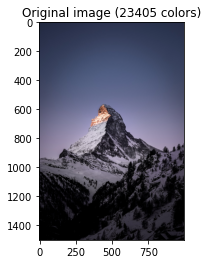

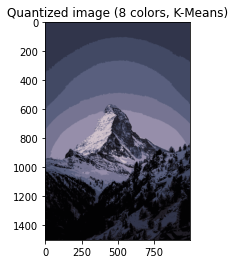

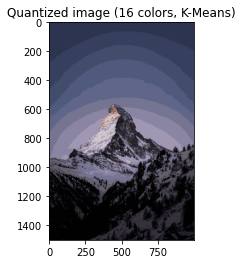

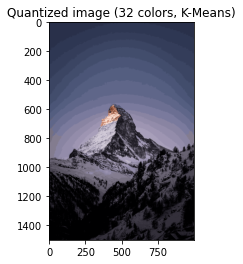

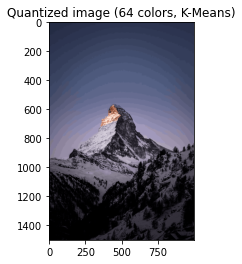

In [12]:
pic = cv2.imread('../input/no-disaster-1/no damage 1/mountain/00000006.jpg')[...,::-1] / 255.0

w, h, d = pic.shape
_2d_pic = np.reshape(pic, (w * h, d))
_2d_pic_sample = shuffle(_2d_pic)[:5000]

plt.title(f'Original image ({len(uniqueColors)} colors)')
plt.imshow(pic)
plt.show()

for clusters in [8, 16, 32, 64]:
    kmeans = KMeans(n_clusters = clusters).fit(_2d_pic_sample)
    labels = kmeans.predict(_2d_pic)

    plt.title(f'Quantized image ({clusters} colors, K-Means)')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()

2) Сгенерируйте набор синтетических данных в виде смеси двух гауссиан, результат объедините в одно множество.

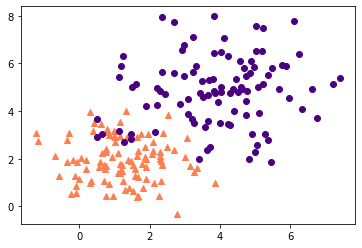

In [49]:
mean_1 = [1, 2]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, 100)

mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, 100)

x = np.concatenate([x_1, x_2])
labels = np.array([0] * 100 + [1] *  100)

plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='coral')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = 'o', color='indigo')
plt.show()

Разделите смесь с помощью EM алгоритма(sklearn.mixture.GaussianMixture), обратите
внимание на параметр covariance_type.

In [50]:
gm = GaussianMixture(n_components = 2, covariance_type = 'diag').fit(x)

С помощью атрибутов weights_ и covariances_
восстановите их значения (сравните с оригинальными).

In [51]:
gm.means_

array([[4.08240309, 4.95232092],
       [1.24468993, 2.02774877]])

In [52]:
gm.covariances_

array([[1.90203486, 2.02126227],
       [1.02810083, 0.88244372]])

Визуализируйте результат.

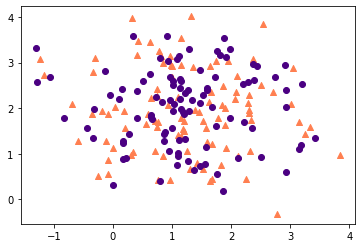

In [53]:
mean_gm = gm.means_[1]
cov_gm = [[gm.covariances_[1][0], 0], [0, gm.covariances_[1][1]]]
x_gm = np.random.multivariate_normal(mean_gm, cov_gm, 100)

plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='coral')
plt.scatter(x_gm[:, 0], x_gm[:, 1], marker = 'o', color='indigo')

3. Обработка текстовых данных


Загрузите набор текстовых данных, снабженных метками классов. Проведите
предобработку данных (удалите стоп-слова, пунктуацию, проведите нормализацию),
постройте визуализацию наиболее частых слов или n-gram в каждом классе (wordcloud),
извлеките признаки (например sklearn.feature_extraction.text .TfidfVectorizer; или
sklearn.decomposition.TruncatedSVD )

In [18]:
import re

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
train = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding = 'latin1')
test = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding = 'latin1')

df = train.append(test, ignore_index = True)

df = df.drop('UserName', axis = 1)
df = df.drop('ScreenName', axis = 1)
df = df.drop('Location', axis = 1)
df = df.drop('TweetAt', axis = 1)

df.head(6)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,Do you remember the last time you paid $2.99 a...,Neutral


In [20]:
def Sentiment_encode(sentiment):
    if sentiment == 'Extremely Positive' or sentiment == 'Positive':
        return 2
    elif sentiment == 'Extremely Negative' or sentiment == 'Negative':
        return 0
    else:
        return 1

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : remove_url(x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : remove_emoji(x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : decontraction(x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : seperate_alphanumeric(x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : unique_char(cont_rep_char,x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : char(x))
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : x.lower())

df['Sentiment'] = df['Sentiment'].apply(lambda x : Sentiment_encode(x))

df.head(6)

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermark...,0
1,when i could not find hand sanitizer at fred m...,2
2,find out how you can protect yourself and love...,2
3,panic buying hits newyork city as anxious shop...,0
4,toiletpaper dunnypaper coronavirus coronavirus...,1
5,do you remember the last time you paid a ...,1


In [21]:
Positive = df[df['Sentiment'] == 2].OriginalTweet
Neutral  = df[df['Sentiment'] == 1].OriginalTweet
Negative = df[df['Sentiment'] == 0].OriginalTweet

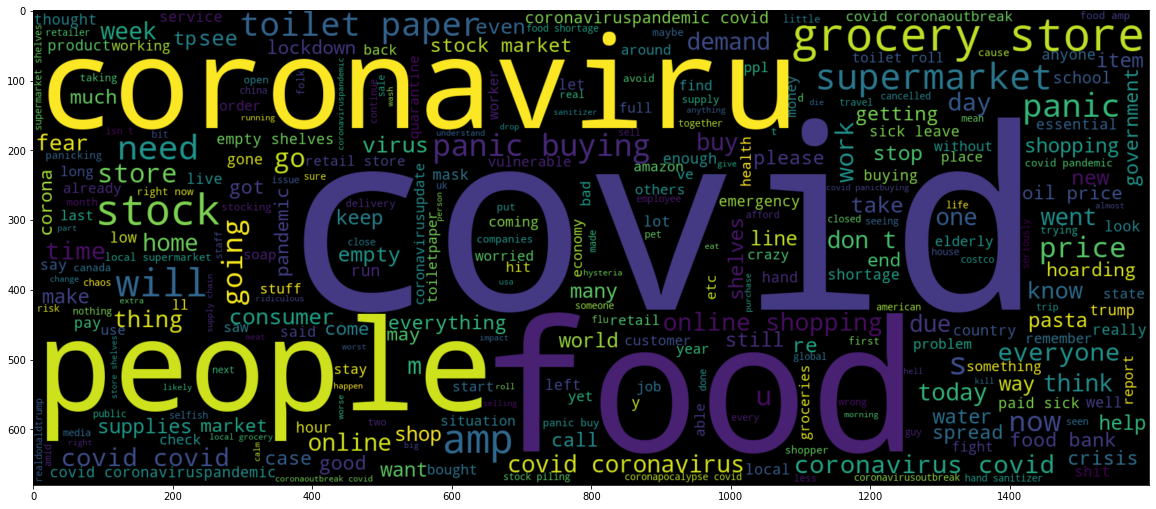

In [22]:
plt.figure(figsize = (20, 20)) 
wordcould = WordCloud(min_font_size = 3, max_words = 300, width = 1600, height = 680).generate(" ".join(Negative))
plt.imshow(wordcould, interpolation = 'bilinear')
plt.grid(False)

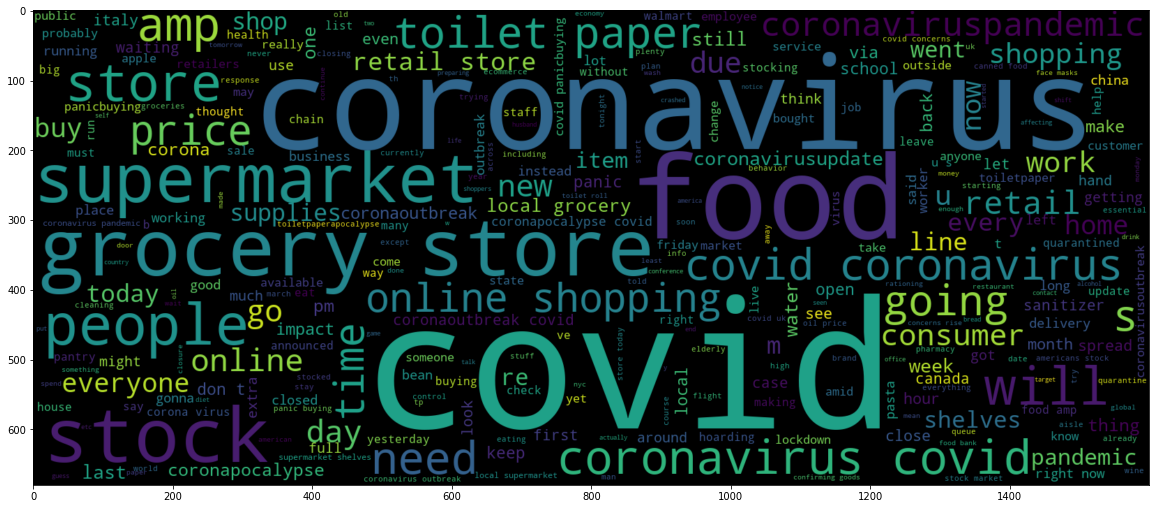

In [23]:
plt.figure(figsize = (20, 20)) 
wordcould = WordCloud(min_font_size = 3, max_words = 300, width = 1600, height = 680).generate(" ".join(Neutral))
plt.imshow(wordcould, interpolation = 'bilinear')
plt.grid(False)

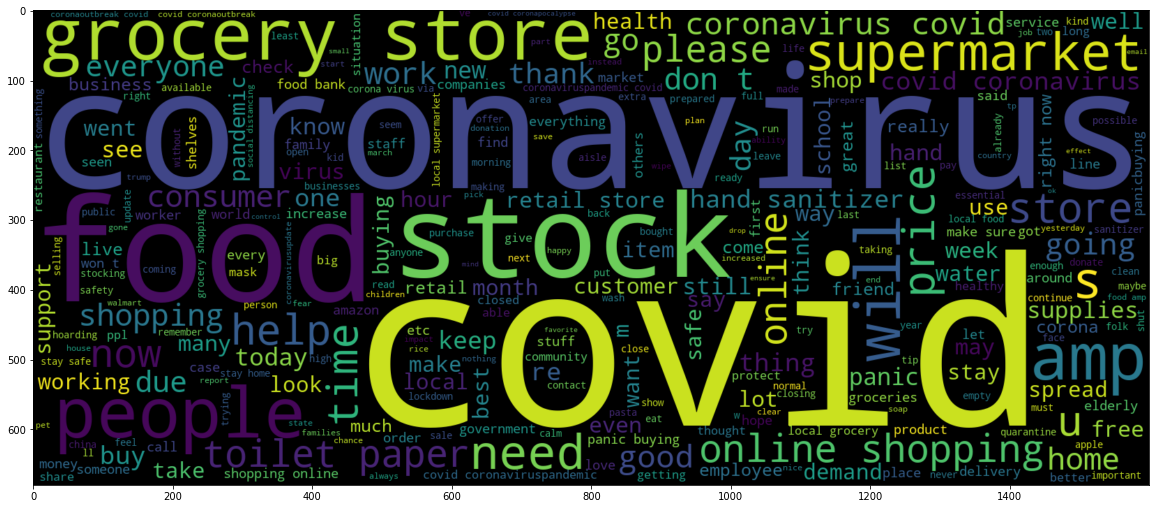

In [24]:
plt.figure(figsize = (20, 20)) 
wordcould = WordCloud(min_font_size = 3, max_words = 300, width = 1600, height = 680).generate(" ".join(Positive))
plt.imshow(wordcould, interpolation = 'bilinear')
plt.grid(False)

In [25]:
def features(data):
        vectorizer = TfidfVectorizer(stop_words = 'english')
        tfidf = vectorizer.fit(data)

        idfs = vectorizer.idf_

        lower_thresh = 3.
        upper_thresh = 6.
        not_often = idfs > lower_thresh
        not_rare = idfs < upper_thresh

        mask = not_often * not_rare

        return np.array(vectorizer.get_feature_names())[mask]

Проведите классификацию текстовых данных, сделайте оценку качества

In [26]:
X = df['OriginalTweet']
Y = df['Sentiment']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf = vectorizer.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [27]:
features(df['OriginalTweet'])

array(['able', 'actually', 'advice', 'afford', 'ago', 'alcohol', 'amazon',
       'americans', 'amid', 'amp', 'apocalypse', 'apple', 'area', 'ask',
       'available', 'avoid', 'away', 'bad', 'bank', 'banks', 'based',
       'basic', 'beans', 'best', 'better', 'big', 'bit', 'bought',
       'bread', 'business', 'businesses', 'buy', 'buying', 'calm',
       'canada', 'cancelled', 'canned', 'care', 'case', 'cases', 'cause',
       'chain', 'change', 'check', 'china', 'city', 'clean', 'cleaning',
       'close', 'closed', 'closing', 'come', 'coming', 'community',
       'companies', 'concerns', 'consider', 'consumer', 'contact',
       'continue', 'control', 'corona', 'coronaoutbreak',
       'coronapocalypse', 'coronavirusoutbreak', 'coronaviruspandemic',
       'coronavirusupdate', 'coronavirusupdates', 'costco', 'country',
       'couple', 'crazy', 'crisis', 'current', 'customers', 'day', 'days',
       'delivery', 'demand', 'did', 'distancing', 'does', 'doing', 'don',
       'donate',

In [28]:
clf = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_features = 'sqrt').fit(X_train, Y_train)

predict = clf.predict(X_test)

In [29]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       666
           1       0.92      0.90      0.91       254
           2       0.95      0.91      0.93       600

    accuracy                           0.93      1520
   macro avg       0.93      0.92      0.93      1520
weighted avg       0.93      0.93      0.93      1520



Примените алгоритм LDA к каждому классу, определите несколько тематик (sklearn.decomposition.LatentDirichletAllocation)


In [30]:
LDA = LatentDirichletAllocation(n_components = 3,
                                max_iter = 30,
                                n_jobs = 6,
                                learning_method = 'batch',
                                verbose = 1)

count_vect = CountVectorizer(stop_words = 'english')

In [31]:
classes = [Positive, Neutral, Negative]

topic_words = []

for cl in classes:
    LDA.fit(count_vect.fit_transform(cl))
    top_topic_words = LDA.components_[0].argsort()[-10:]
    for i in top_topic_words:
        topic_words.append(count_vect.get_feature_names()[i])

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30
iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_it

In [32]:
p = set(topic_words[:10])
ne = set(topic_words[10:20])
n = set(topic_words[20:])

In [33]:
p_unique = (p.difference(ne)).difference(n)
p_unique

{'amp', 'help', 'retail'}

In [34]:
ne_unique = (ne.difference(p)).difference(n)
ne_unique

{'grocery', 'stock'}

In [35]:
n_unique = (n.difference(p)).difference(ne)
n_unique

{'panic'}

In [36]:
(p.intersection(ne)).intersection(n)

{'coronavirus', 'covid', 'food', 'people'}